# Question 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, auc
from mnist.loader import MNIST


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
train_set = pd.read_csv('train_new.csv',names = ['one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen'])
test_set = pd.read_csv('test_new.csv',names = ['one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen'])


total_set = train_set.append(test_set)
total_set.head()

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:

y_train = total_set.iloc[0:30161,-1]
y_test = total_set.iloc[30161:,-1]

total_set.drop('fifteen',axis = 1,inplace = True)

total_set = pd.get_dummies(total_set)

x_train = total_set.iloc[0:30161,:]
x_test = total_set.iloc[30161:,:]


scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train  = np.c_[np.ones(len(x_train)),x_train]
x_test  = np.c_[np.ones(len(x_test)),x_test]


# Logistic Regression without regularization as a classifier 

In [5]:
iter = 2000
theta = np.zeros(x_train.shape[1]).T  
alpha = 0.1
n = len(x_train)

cost = np.empty(iter)
for i in range(iter):
    z = x_train.dot(theta)
    Y_pred = sigmoid(z)
    cost[i] = (-1 / n) * (y_train.T.dot(np.log(Y_pred)) + (1 - y_train).T.dot(np.log(1 - Y_pred)) )
    theta = theta - (alpha / n) * (x_train.T.dot(Y_pred - y_train)) 
    
h_theta = x_test.dot(theta)
h_theta[h_theta < 0.5] = 0
h_theta[h_theta >= 0.5] = 1

print("Model accuracy is:" , accuracy_score(y_test,h_theta) * 100)


Model accuracy is: 82.29865214793173


# Logistic Regression with L1 regularization

Model accuracy is: 82.29865214793173


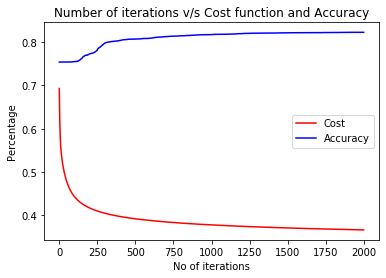

In [6]:
iter = 2000
theta = np.zeros(x_train.shape[1]).T  
alpha = 0.1
n = len(x_train)
l1_param = 0.01

cost = np.empty(iter)
accuracy = np.empty(iter)
for i in range(iter):
    z = x_train.dot(theta)
    Y_pred = sigmoid(z)
    cost[i] = (-1 / n) * (y_train.T.dot(np.log(Y_pred)) + (1 - y_train).T.dot(np.log(1 - Y_pred)) + (l1_param * (np.sum(np.abs(theta)))))  
    theta = theta - (alpha / n) * (x_train.T.dot(Y_pred - y_train)) 
    h_theta = x_test.dot(theta)
    h_theta[h_theta < 0.5] = 0
    h_theta[h_theta >= 0.5] = 1
    accuracy[i] = accuracy_score(y_test,h_theta)
    


print("Model accuracy is:" , accuracy_score(y_test,h_theta) * 100)

plt.plot(np.arange(0,iter),cost,'r-',label = 'Cost')
plt.plot(np.arange(0,iter),accuracy,'b-',label = 'Accuracy')
plt.xlabel("No of iterations")
plt.ylabel("Percentage")
plt.title("Number of iterations v/s Cost function and Accuracy")
plt.legend()
plt.show()


# Logistic Regression with L2 regularization 

Model accuracy is: 82.29865214793173


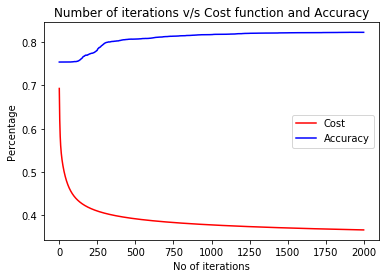

In [7]:
iter = 2000
theta = np.zeros(x_train.shape[1]).T  
alpha = 0.1
n = len(x_train)
l2_param = 0.01

cost = np.empty(iter)
accuracy = np.empty(iter)

for i in range(iter):
    z = x_train.dot(theta)
    Y_pred = sigmoid(z)
    cost[i] = (-1 / n) * (y_train.T.dot(np.log(Y_pred)) + (1 - y_train).T.dot(np.log(1 - Y_pred)) + (l2_param * (np.sum(theta**2))))  
    theta = theta - (alpha / n) * (x_train.T.dot(Y_pred - y_train)) 
    h_theta = x_test.dot(theta)
    h_theta[h_theta < 0.5] = 0
    h_theta[h_theta >= 0.5] = 1
    accuracy[i] = accuracy_score(y_test,h_theta)
    


print("Model accuracy is:" , accuracy_score(y_test,h_theta) * 100)

plt.plot(np.arange(0,iter),cost,'r-',label = 'Cost')
plt.plot(np.arange(0,iter),accuracy,'b-',label = 'Accuracy')
plt.xlabel("No of iterations")
plt.ylabel("Percentage")
plt.title("Number of iterations v/s Cost function and Accuracy")
plt.legend()
plt.show()


# Conclusion:
### By reducing the sum of absolute values of the coefficients, what Lasso Regularization (L1 Norm) does is to reduce the number of features in the model altogether to predict the target variable.
### On the other hand, by reducing the sum of square of coefficients, Ridge Regularization (L2 Norm) doesn’t necessarily reduce the number of features, but rather reduces the magnitude/impact that each features has on the model by reducing the coefficient value.
### Both regularization does indeed prevent the model from overfitting, but I would like to think of Lasso Regularization as reducing the quantity of features while Ridge Regularization as reducing the quality of features.

# Question 2

In [8]:
mndata = MNIST(gz=True)
images, labels = mndata.load_training()
x_train, y_train = np.array(images), np.array(labels)
images, labels = mndata.load_testing()
x_test, y_test = np.array(images), np.array(labels)

## One vs All Logistic Regression with L1 regularization

In [9]:
logreg_with_L1 = LogisticRegression(penalty='l1', multi_class='ovr', solver='liblinear')
logreg_with_L1.fit(x_train, y_train)
print('Training accuracy: ',logreg_with_L1.score(x_train, y_train) * 100)
print('Testing accuracy: ',logreg_with_L1.score(x_test, y_test) * 100)

Training accuracy:  93.18833333333333
Testing accuracy:  91.75


## One vs All Logistic Regression with L2 regularization

In [10]:
images, labels = mndata.load_training()
x_train, y_train = np.array(images), np.array(labels)
images, labels = mndata.load_testing()
x_test, y_test = np.array(images), np.array(labels)

logreg_with_L2 = LogisticRegression(penalty='l2', multi_class='ovr', solver='liblinear',max_iter = 1000)
logreg_with_L2.fit(x_test, y_test)
print('Training accuracy: ',logreg_with_L2.score(x_train, y_train) * 100)
print('Testing accuracy: ',logreg_with_L2.score(x_test, y_test) * 100)

Training accuracy:  85.38833333333334
Testing accuracy:  98.88


### Observation:
###  Since the training accuracy and testing accuracy are almost the same with both L1 and L2 regularization, we can conclude that the model is a good fit.

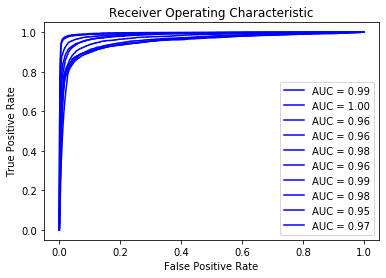

In [11]:
probabs = logreg_with_L2.predict_proba(x_train)
classes = range(10)
y_test = label_binarize(y_train, classes)

for i in range(10):
    preds = probabs[:,i]    
    fpr, tpr, threshold = roc_curve(y_test[:, i], preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()